

## Professor: Rogério Martins Gomes

## Alunos: Aritana Noara Costa Santos  e Victor Augusto Januário da Cruz

### 1. Regressão linear com uma variável

In [390]:
![image.png](attachment:image.png)

/bin/bash: -c: linha 0: erro de sintaxe próximo ao token inesperado `attachment:image.png'
/bin/bash: -c: linha 0: `[image.png](attachment:image.png)'


### 1) Coletando o arquivo data1.txt:

In [391]:
import pandas as pd
import numpy as np

filename = '/home/aritana/my_jupyter_notebook/linearRegressionOneMultipleVariables/data1.txt'


data = pd.read_csv(filename,sep=',',header=None).values


#definindo os eixos
x = data[:, 0]
y = data[:, 1]

print(pd.read_csv(filename,sep=',',header=None))

#fonte:http://awesci.com/reading-and-plotting-data-in-jupyter-notebook/

          0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


### 1) Plotando os dados:

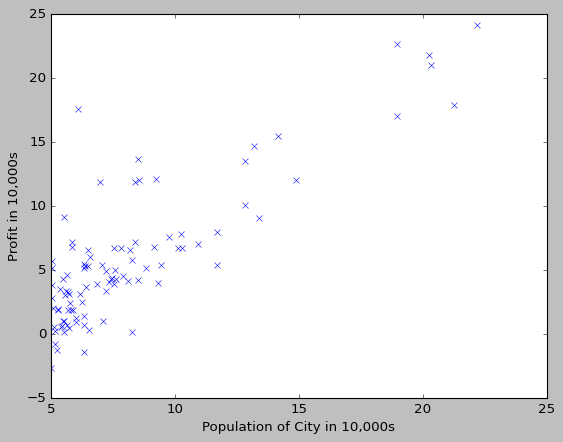

In [392]:
import matplotlib.pyplot as plt

plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.plot(x,y,'x')
plt.show()

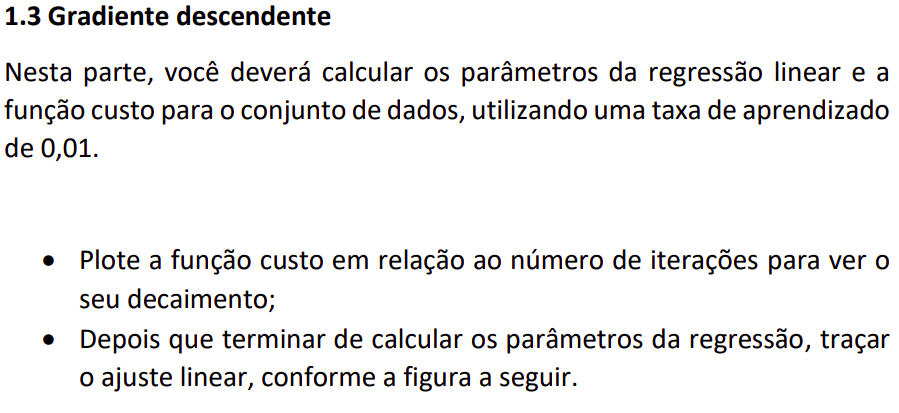

## Fundamentação teórica:
### a) Objetivo: minimizar função custo (Erro médio quadrático)

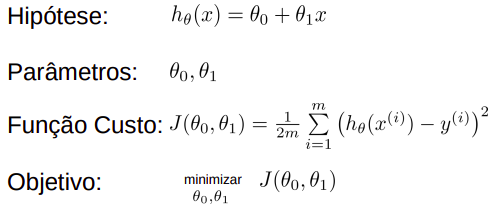

### b) Algoritimo:
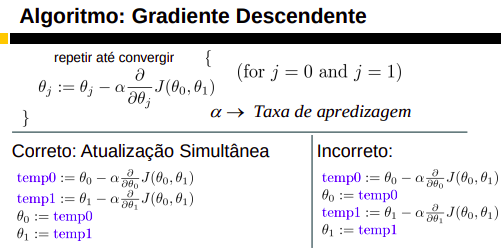

### c)  Definição de alfa e das derivadas da função custo:

#### Alfa: 
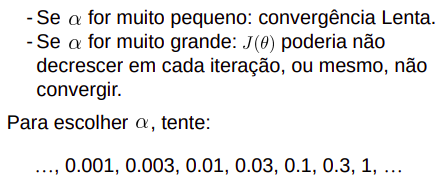
#### derivadas: 
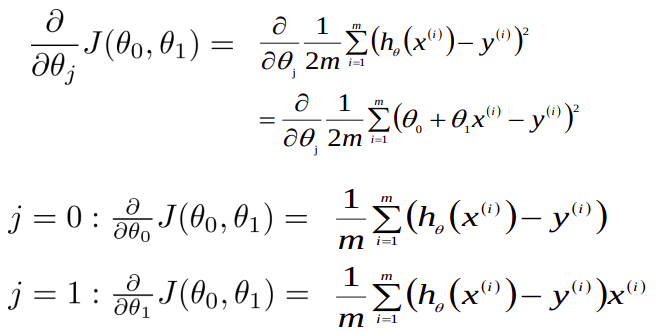


In [393]:
#start with some Teta0 and Teta1, say (0,0)
#keep changing  Teta0 and Teta1, to reduce J(Teta0,Teta1) until end up at a minimum
#Update Teta0 and Teta1 simultaneously

### Derivadas da função custo em relação aos parâmetros

In [394]:
import matplotlib.pyplot as plt


def Dj_dteta0(teta0, teta1, xi, yi, m):
    resultado = 0
    for i in range (m):
        resultado = resultado + (teta0 + teta1 * xi[i] - yi[i])
    return resultado/m
        
def Dj_dteta1(teta0, teta1, xi, yi, m):
    resultado = 0
    for i in range (m):
        resultado = resultado + (teta0 + teta1 * xi[i] - yi[i])* xi[i]
    return resultado/m    

def FuncaoCusto(teta0, teta1, xi, yi, m):
    resultado = 0
    custo = []
    for i in range (m):
        custo.append(((teta0 + teta1 * xi[i]) - yi[i])**2)        
    for i in range (m):    
        resultado = resultado + custo[i]
    return resultado/(2*m)        

def plotGrafico(x,y,h):
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in 10,000s")
    plt.plot(x,y,'x',label="Training data")
    plt.plot(x,h,label="Linear regression")   
    plt.legend(loc='upper left', frameon=False)
    plt.show()
    
def plotGraficoFuncaoCusto(teta1,custo):
    plt.grid()
    plt.xlabel("Teta1")
    plt.ylabel("J ( Tteta1 )")
    plt.plot(teta1,custo, label= "Teta1")
    plt.legend(loc='upper left', frameon=False)
    plt.show()    

## Testes das funções declaradas anteriormente.

14.0
32.0
[3, 5, 7]


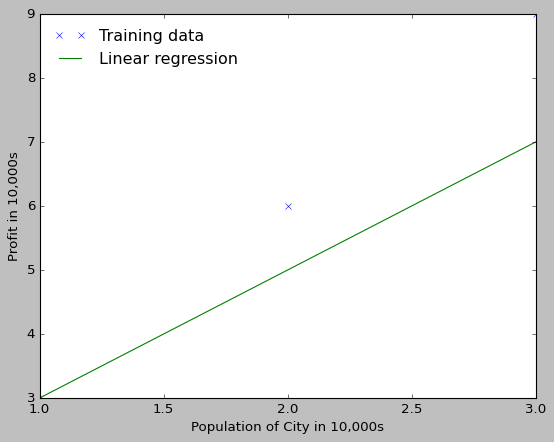

funcao custo para teta = 0: 2.3333333333333335
teta, custo: 1 0.0
teta, custo: 0.5 0.5833333333333334
teta, custo: 0 2.3333333333333335


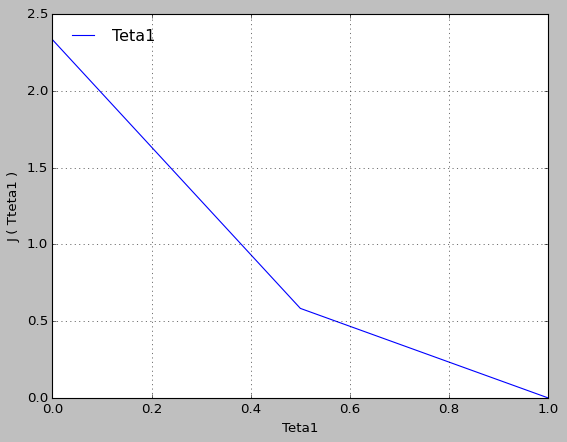

In [395]:
# ESTE ARQUIVO É APENAS PARA TESTE UNITARIO
teta0 = 2
teta1 = 9
xi = [1,2,3]
yi = [3, 6, 9]
m = 3
alfa = 0.01

#Teste das derivadas

dj_dteta0 = Dj_dteta0(teta0, teta1, xi, yi, m)
print(dj_dteta0)

if(round(dj_dteta0,11)!=14.0):
    print("Erro em dj_dteta0")
    

dj_dteta1 = Dj_dteta1(teta0, teta1, xi, yi, m)
print(dj_dteta1)

if(round(dj_dteta1,11)!=32.0):
    print("Erro em dj_dteta1")


#Teste da regressao

#funcao 1 + 2x
hi = []
for i in range (m):
    hi.append(1 + 2 * xi[i])

print(hi)
plotGrafico(xi,yi,hi)

#Teste da funcao custo
xi = [1,2,3]
yi = [1,2,3]
m=3
a =FuncaoCusto(0, 0, xi, yi, m)
print("funcao custo para teta = 0:",a)

#Teste plotar funcao custo
teta1=[1, 0.5, 0]
custo = []
for i in range (m):
    custo.append(FuncaoCusto(0, teta1[i], xi, yi, m))
    print("teta, custo:",teta1[i],custo[i])
plotGraficoFuncaoCusto(teta1,custo)

In [396]:
xi = [1,2,3]
yi = [1,2,3]
m=3
a =FuncaoCusto(0, 0, xi, yi, m)
print(a)

2.3333333333333335


### Execução

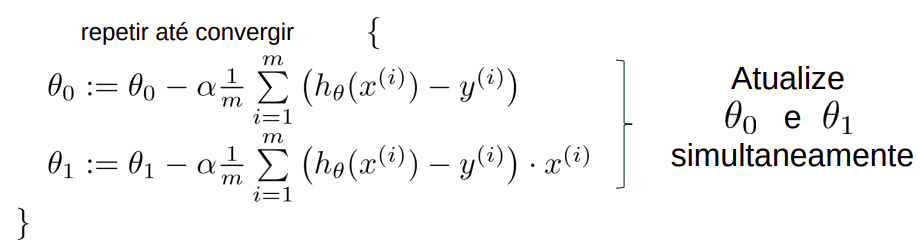

#### A convergência se dá em um mínimo local ou global onde a derivada se anula e os valores de teta0 e teta1 serão sempre constantes, pois não haverá inclinação (derivada nula).

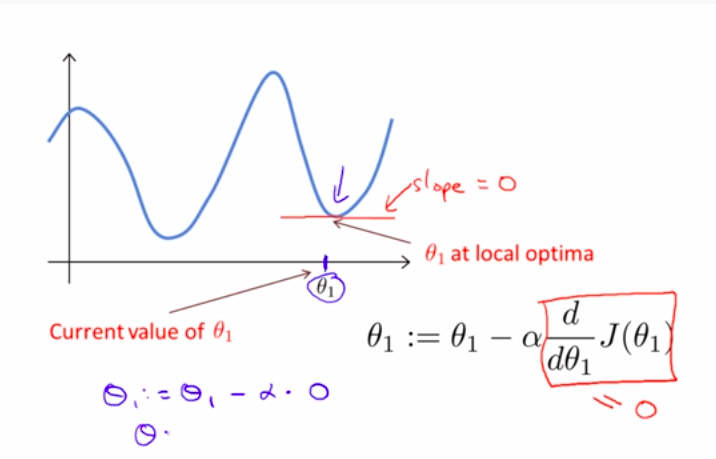

Fonte: https://www.youtube.com/watch?v=YovTqTY-PYY&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=9

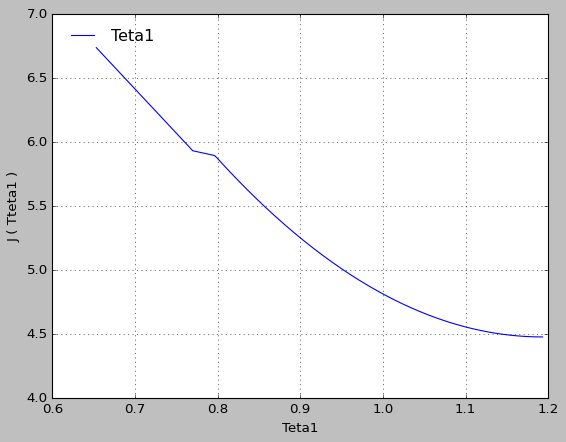

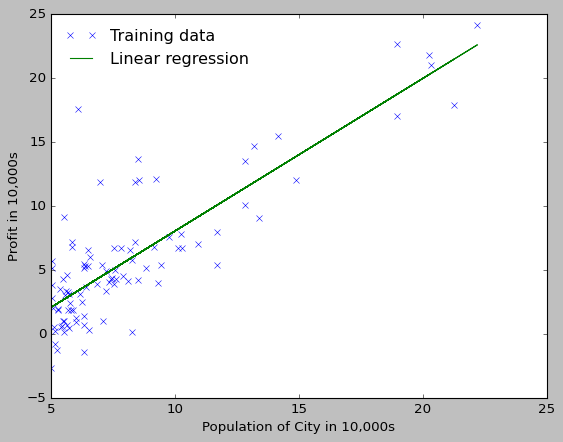

In [397]:
#Definir Valores iniciais
# vetor x e vetor y ja foram definidos anteriormente

x = x #vetorx
y = y #vetory
teta0 = 0
teta1 = 0
alfa = 0.01
m = len(x)
h = []
#para impressao
vetorCusto = []
vetorTeta1 = []

while(1):
    dj_dteta0 = Dj_dteta0(teta0, teta1, x, y, m)
    temp0 = teta0 - alfa * dj_dteta0

    dj_dteta1 = Dj_dteta1(teta0, teta1, x, y, m)
    temp1 = teta1 - alfa * dj_dteta1

    if(temp1 == teta1 ):
        break        
    teta0 = temp0
    teta1 = temp1   

    vetorTeta1.append(teta1)
    vetorCusto.append(FuncaoCusto(teta0, teta1, x, y, m))#atualiza custo

#imprimir grafico do teta1   
plotGraficoFuncaoCusto(vetorTeta1,vetorCusto)

#imprimir grafico da regressão linear
for i in range(m):   
    h.append(teta0 + teta1 * x[i])
plotGrafico(x,y,h)
        


## Conclusão da parte 01: Regressão linear com uma variável

O gráfico da variação da função de custo, ajuste linear, que é o erro médio quadrático, em relação a Teta 01 evidencia que através do método do gradiente descendente, foi obtido, a um teta0 qualquer, um teta01 que minimizasse a fução custo. 
 Foi definido no código que quando Teta01 parasse de variar, característica de derivada nula, fosse o ponto de parada.Quando se aproxima do mínimo local, o gradiente descendente automaticamente conduzirá asteps menores. Assim, não é necessário diminuir o valor de α ao longo do tempo.
Com posse dessas informações no gráfico "population x profit" acima, foi evidenciada reta de regressão linear:
### Hipóstese = teta0 + teta1 * x
que melhor se adequa aos dados do treinamento.

 ## 2. Regressão linear com múltiplas variáveis

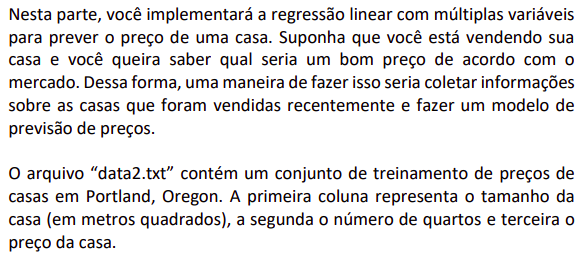

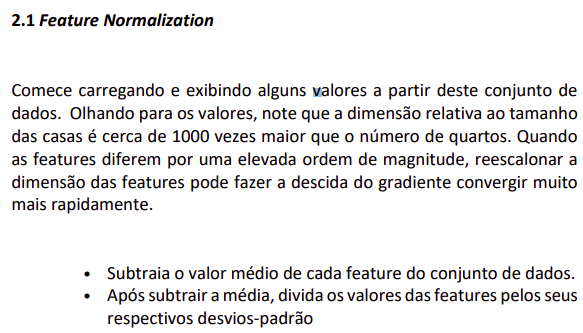

In [398]:
#Funcões



def DesvioPadrao(mean,numberOfPoints,points):
    serie = 0
    for i in range(numberOfPoints):
        serie = serie + (points[i] - mean)**2
    sd = math.sqrt(serie/numberOfPoints)
    return sd


In [399]:
import pandas as pd
import numpy as np


filename = '/home/aritana/my_jupyter_notebook/linearRegressionOneMultipleVariables/data2.txt'


data = pd.read_csv(filename,sep=',',header=None).values


print(pd.read_csv(filename,sep=',',header=None))


       0  1       2
0   2104  3  399900
1   1600  3  329900
2   2400  3  369000
3   1416  2  232000
4   3000  4  539900
5   1985  4  299900
6   1534  3  314900
7   1427  3  198999
8   1380  3  212000
9   1494  3  242500
10  1940  4  239999
11  2000  3  347000
12  1890  3  329999
13  4478  5  699900
14  1268  3  259900
15  2300  4  449900
16  1320  2  299900
17  1236  3  199900
18  2609  4  499998
19  3031  4  599000
20  1767  3  252900
21  1888  2  255000
22  1604  3  242900
23  1962  4  259900
24  3890  3  573900
25  1100  3  249900
26  1458  3  464500
27  2526  3  469000
28  2200  3  475000
29  2637  3  299900
30  1839  2  349900
31  1000  1  169900
32  2040  4  314900
33  3137  3  579900
34  1811  4  285900
35  1437  3  249900
36  1239  3  229900
37  2132  4  345000
38  4215  4  549000
39  2162  4  287000
40  1664  2  368500
41  2238  3  329900
42  2567  4  314000
43  1200  3  299000
44   852  2  179900
45  1852  4  299900
46  1203  3  239500


In [400]:
#Funções
import math 

def media(vetor):
    resultado = 0
    for i in range(len(vetor)):
        resultado = resultado + vetor[i]
    return resultado / len(vetor)

def desvioPadrao(mean,numberOfPoints,points):
    serie = 0
    for i in range(numberOfPoints):
        serie = serie + (points[i] - mean)**2
    sd = math.sqrt(serie/numberOfPoints)
    return sd

def subtrairValorMedio(vetor,media):
    resultado = []
    for i in range(len(vetor)):
        resultado.append(vetor[i]-media)
    return resultado   

def dividirPeloDesvioPadrao(vetor, desvioPadrao):
    resultado = []
    for i in range(len(vetor)):
        resultado.append(vetor[i]/desvioPadrao)
    return resultado  

### Feature Normalization

In [401]:
# Calculating mean and standard deviation
import statistics


#definindo os eixos , teta0 + teta1*x1 + teta2 * x2
x0 = 1
x1 = data[:, 0]#tamanho
x2 = data[:, 1]#quartos
y = data[:, 2]#preço
n = 2 # numero de features [x1,x2]
size = len(x1)

#Media e desvio Padrão


meanX1 = media(x1)
meanX2 = media(x2)

sdX1 = desvioPadrao(meanX1,size,x1)
sdX2 = desvioPadrao(meanX2,size,x2)

x1 = subtrairValorMedio(x1,meanX1)
x2 = subtrairValorMedio(x2,meanX2)

x1 = dividirPeloDesvioPadrao(x1, sdX1)
x2 = dividirPeloDesvioPadrao(x2, sdX2)
#Features foram normalizadas


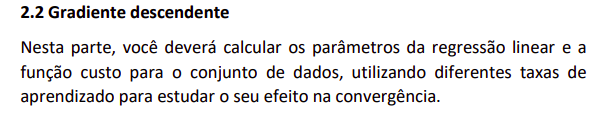

In [402]:
##Funcoes
import matplotlib.pyplot as plt


def Dj_dteta0(teta0, teta1, teta2, x1, x2, y, m):
    resultado = 0
    for i in range (m):
        resultado = resultado + (teta0 + teta1 * x1[i]+ teta2 * x2[i] - y[i])
    return resultado/m
        
def Dj_dteta1(teta0, teta1, teta2, x1, x2, y, m):
    resultado = 0
    for i in range (m):
        resultado = resultado + (teta0 + teta1 * x1[i]+ teta2 * x2[i] - y[i])*x1[i]
    return resultado/m    

def Dj_dteta2(teta0, teta1, teta2, x1, x2, y, m):
    resultado = 0
    for i in range (m):
        resultado = resultado + (teta0 + teta1 * x1[i]+ teta2 * x2[i] - y[i])*x2[i]
    return resultado/m   

def FuncaoCusto(teta0, teta1,teta2, x1,x2, y, m):
    resultado = 0
    custo = []
    for i in range (m):
        custo.append(((teta0 + teta1 * x1[i] + teta2 * x2[i])- y[i])**2)        
    for i in range (m):    
        resultado = resultado + custo[i]
    return resultado/(2*m)        

def plotGrafico(x,y,h):
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in 10,000s")
    plt.plot(x,y,'x',label="Training data")
    plt.plot(x,h,label="Linear regression")   
    plt.legend(loc='upper left', frameon=False)
    plt.show()
    
def plotGraficoFuncaoCusto(iteracoes,custo):
    plt.grid()
    plt.xlabel("No. de iterações")
    plt.ylabel("min J (teta)")
    plt.plot(iteracoes,custo)
    plt.show()    

### Execução

In [403]:
#Definir Valores iniciais
# vetor x e vetor y ja foram definidos anteriormente

def executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2):
    m = len(x1)
    h = []
    #para impressao
    vetorCusto = []
    vetorNumeroIteracoes = []
    
    #teta0 + teta1*x1 + teta2 * x2 
    for i in range(NoIteracoes):
        dj_dteta0 = Dj_dteta0(teta0, teta1, teta2, x1, x2, y, m)
        temp0 = teta0 - alfa * dj_dteta0

        dj_dteta1 = Dj_dteta1(teta0, teta1, teta2, x1, x2, y, m)
        temp1 = teta1 - alfa * dj_dteta1

        dj_dteta2 = Dj_dteta2(teta0, teta1, teta2, x1, x2, y, m)
        temp2 = teta1 - alfa * dj_dteta2  

        #atualiza parametros      
        teta0 = temp0
        teta1 = temp1   
        teta2 = temp2

        #custo e iteracoes para serem plotados
        vetorNumeroIteracoes.append(i)    
        vetorCusto.append(FuncaoCusto(teta0, teta1,teta2, x1,x2, y, m))#atualiza custo

    #Plote a função custo em relação ao número de iterações para ver o seu decaimento; 
    plotGraficoFuncaoCusto(vetorNumeroIteracoes,vetorCusto)
    return vetorCusto


def convergente(vetorCusto):
    iteracoes = len(vetorCusto)-1
    ultimaIteracao = vetorCusto[iteracoes]
    penultimaIteracao = vetorCusto[iteracoes -1]

    calculoDIvergencia = penultimaIteracao - ultimaIteracao
    if(calculoDIvergencia <= 0.001):       
        print("Convergente")
    else:
        print("Divergente")        

### Verificar diferentes taxas de aprendizado      

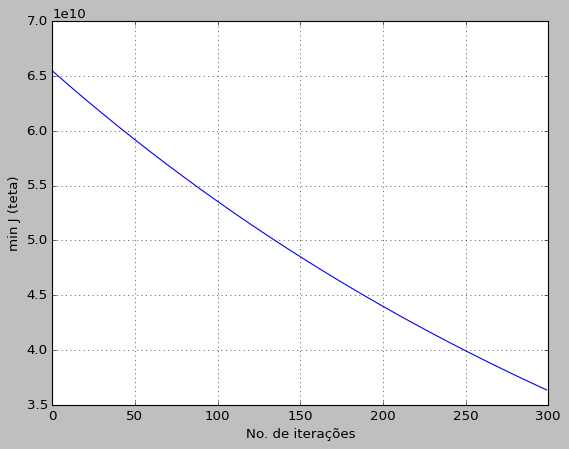

Divergente


In [404]:
x1 = x1 #vetorx
x2 = x2 #vetory
y = y
teta0 = 0
teta1 = 0
teta2 = 0
alfa = 0.001
NoIteracoes = 300

vetorCusto = executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
convergente(vetorCusto)

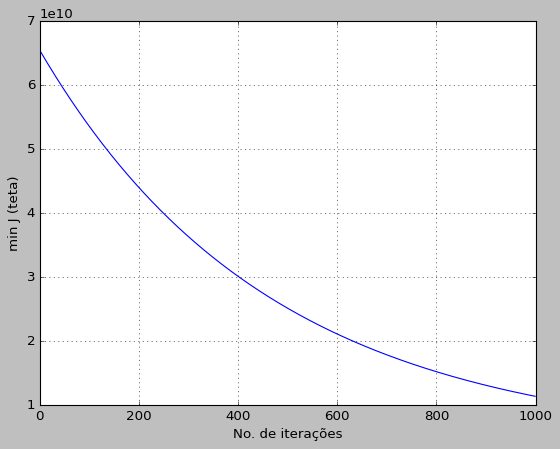

Divergente


In [405]:
alfa = 0.001
NoIteracoes = 1000

vetorCusto = executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
convergente(vetorCusto)

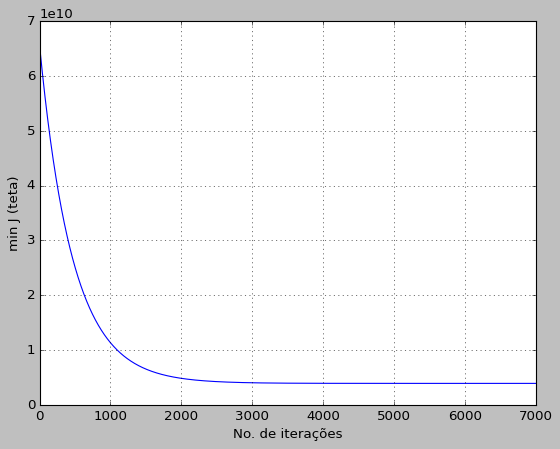

Convergente


In [406]:
alfa = 0.001
NoIteracoes = 7000

vetorCusto = executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
convergente(vetorCusto)

### Para valores de alfa = 0.001 a convergencia é muito lenta  e exige no mínimo 7000 iteracoes.

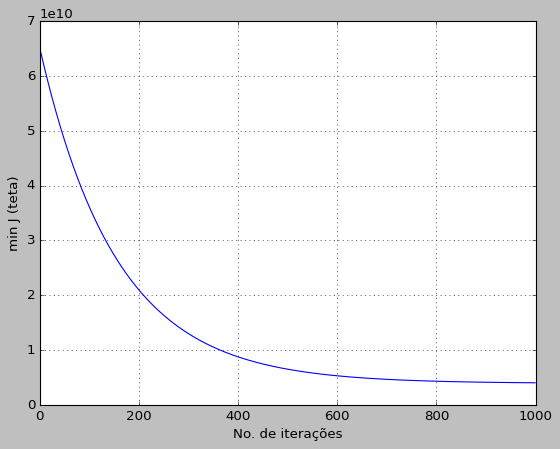

Divergente


In [407]:
alfa = 0.003
NoIteracoes = 1000

vetorCusto = executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
convergente(vetorCusto)

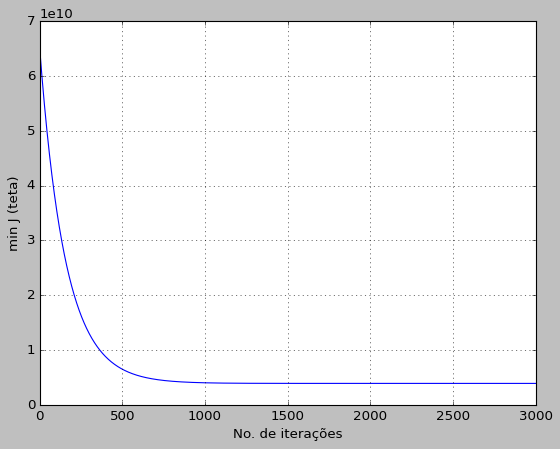

Convergente


In [408]:
alfa = 0.003
NoIteracoes = 3000

vetorCusto = executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
convergente(vetorCusto)

### Para valores de alfa = 0.003 a convergencia é mais rápida comparadaa ao alfa=0.001 lenta  e exige no mínimo 3000 iteracoes.

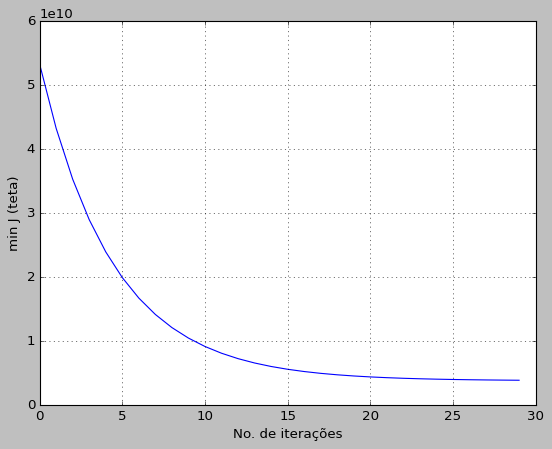

Divergente


In [409]:
alfa = 0.1
NoIteracoes = 30

vetorCusto = executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
convergente(vetorCusto)

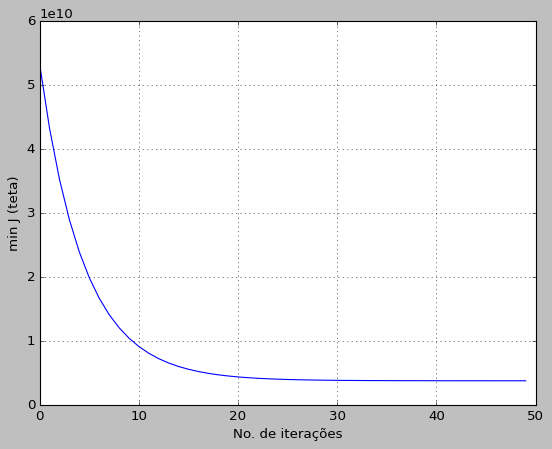

Divergente


In [410]:
alfa = 0.1
NoIteracoes = 50

vetorCusto = executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
convergente(vetorCusto)

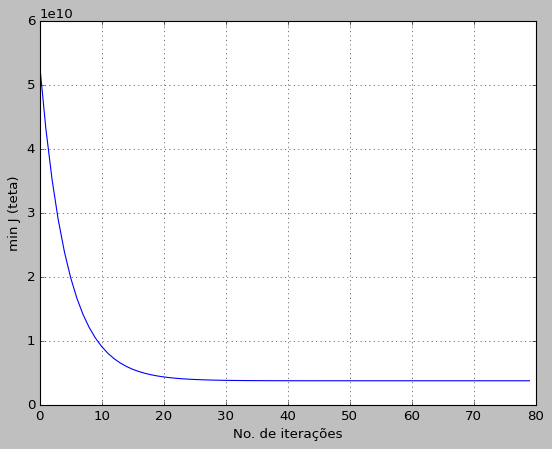

Convergente


In [411]:
alfa = 0.1
NoIteracoes = 80

vetorCusto = executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
convergente(vetorCusto)

### Para valores de alfa = 0.1 a convergencia é mais rápida em relação aos resultados anteriores  e exige no mínimo 80 iteracoes.

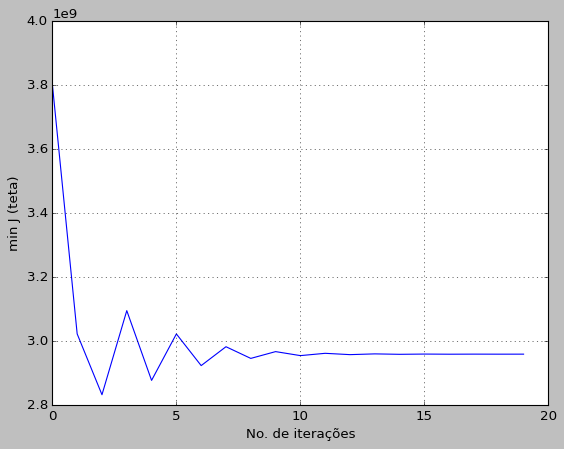

Convergente


In [412]:
alfa = 1
NoIteracoes = 20

vetorCusto = executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
convergente(vetorCusto)

### Para valores de alfa = 1 a convergencia é mais rápida em relação aos resultados anteriores  e exige no mínimo 20 iteracoes.

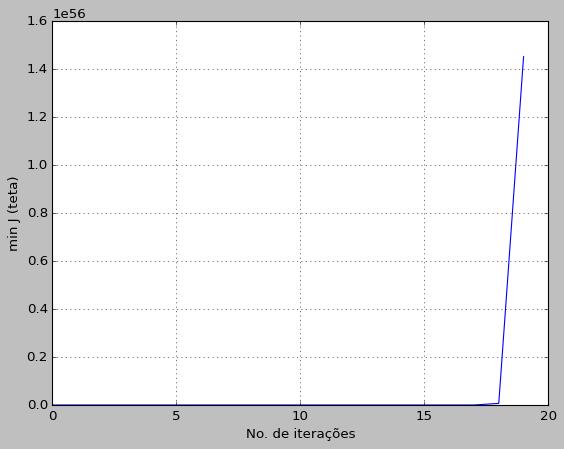

Convergente


In [413]:
alfa = 10
NoIteracoes = 20

vetorCusto = executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
convergente(vetorCusto)

### Com alfas maiores, como 10, não é possível executar a operação para minizar a função custo.  Os valores não conseguem alcançar os mínimos locais.

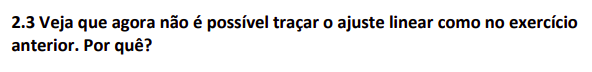

### 2.3: O exercício trabalha com três dimensões e seria apenas traçar as curvas de níveis da superfície.

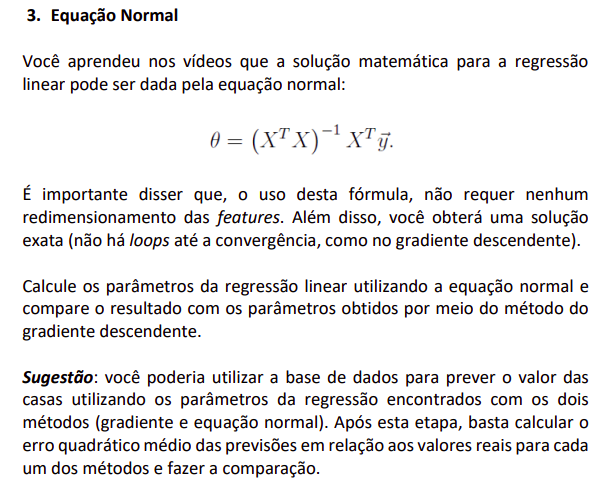

In [ ]:
#definindo os eixos , teta0 + teta1*x1 + teta2 * x2
x0 = 1
x1 = data[:, 0]#tamanho
x2 = data[:, 1]#quartos
y = data[:, 2]#preço
n = 2 # numero de features [x1,x2]
size = len(x1)
